In [1]:
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#nltk.download('averaged_perceptron_tagger')

In [3]:
from nltk.corpus import brown

In [4]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [5]:
corpus = ' '.join(brown.words()[:500])

In [6]:
def tokenize(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words]
    return words

In [7]:
def generate_ngrams(text, n):
    words = nltk.word_tokenize(text)
    ngrams = []
    for i in range(len(words)-n+1):
        ngram = ' '.join(words[i:i+n])
        ngrams.append(ngram)
    return ngrams

In [8]:
def get_freq(ngrams):
    freq = Counter(ngrams)
    return freq

In [9]:
uni = generate_ngrams(corpus, 1)
freq1 = get_freq(uni)

In [10]:
bi_gram = generate_ngrams(corpus, 2)
freq2 = get_freq(uni)

In [11]:
tri_gram = generate_ngrams(corpus, 3)
freq3 = get_freq(uni)

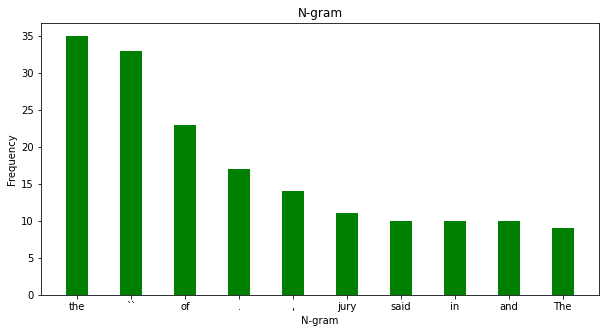

-----------------------------------------------------------------------------


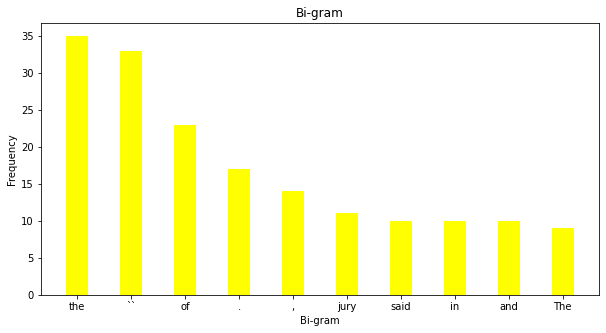

-----------------------------------------------------------------------------


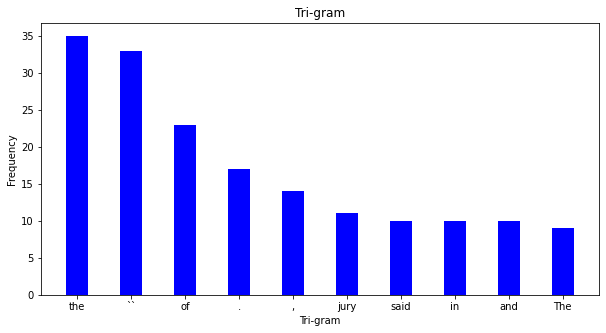

In [12]:
sorted_freq1 = sorted(freq1.items(), key=lambda x: x[1], reverse=True)
top_freq1 = dict(sorted_freq1[:10])
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(top_freq1.keys(),top_freq1.values(), color ='green',
        width = 0.4)
 
plt.xlabel("N-gram")
plt.ylabel("Frequency")
plt.title("N-gram")
plt.show()

print("-----------------------------------------------------------------------------")

sorted_freq2 = sorted(freq2.items(), key=lambda x: x[1], reverse=True)
top_freq2 = dict(sorted_freq2[:10])
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(top_freq2.keys(),top_freq2.values(), color ='yellow',
        width = 0.4)
 
plt.xlabel("Bi-gram")
plt.ylabel("Frequency")
plt.title("Bi-gram")
plt.show()

print("-----------------------------------------------------------------------------")

sorted_freq3 = sorted(freq3.items(), key=lambda x: x[1], reverse=True)
top_freq3 = dict(sorted_freq3[:10])
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(top_freq3.keys(),top_freq3.values(), color ='blue',
        width = 0.4)
 
plt.xlabel("Tri-gram")
plt.ylabel("Frequency")
plt.title("Tri-gram")
plt.show()

In [13]:
def get_ngrams_with_pos(text, n):
    words = tokenize(text)
    pos_tags = nltk.pos_tag(words)
    ngrams = [(tuple([pos_tags[i+j][1] for j in range(n)]), tuple([words[i+j] for j in range(n)])) for i in range(len(words)-n+1)]
    return ngrams

In [14]:
def get_freq(ngrams, pos_tags=None):
    freq = Counter(ngrams)
    if pos_tags is not None:
        filtered_ngrams = [ngram for ngram in ngrams if ngram[0] == pos_tags]
        freq = Counter(filtered_ngrams)
    return freq

In [15]:
ngrams = get_ngrams_with_pos(corpus, 1) 
freq = get_freq(ngrams, ('NNP', 'VBP'))
freq

Counter()

In [16]:
bigram = get_ngrams_with_pos(corpus, 2) 
freq_2 = get_freq(bigram, ('NNP', 'VBP'))
freq_2

Counter()

In [17]:
trigram = get_ngrams_with_pos(corpus, 3)
freq_3 = get_freq(trigram, ('NNP', 'VBP'))
freq_3

Counter()

In [19]:
unigram_freq = Counter(ngrams)
bigram_freq = Counter(bigram)
trigram_freq = Counter(trigram)

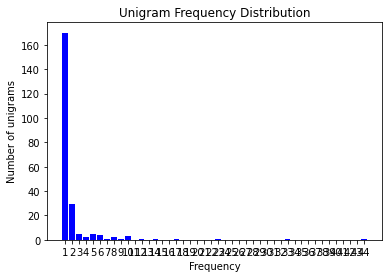

-----------------------------------------------------------------------------


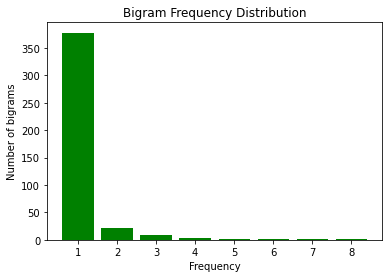

-----------------------------------------------------------------------------


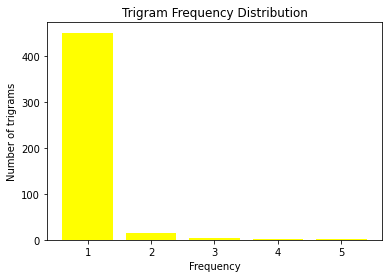

In [20]:
plt.hist(list(unigram_freq.values()), bins=range(1,max(list(unigram_freq.values()))+2), rwidth=0.8, align='left',color ='blue')
plt.xticks(range(1,max(list(unigram_freq.values()))+1))
plt.xlabel('Frequency')
plt.ylabel('Number of unigrams')
plt.title('Unigram Frequency Distribution')
plt.show()


print("-----------------------------------------------------------------------------")


plt.hist(list(bigram_freq.values()), bins=range(1,max(list(bigram_freq.values()))+2), rwidth=0.8, align='left',color ='green')
plt.xticks(range(1,max(list(bigram_freq.values()))+1))
plt.xlabel('Frequency')
plt.ylabel('Number of bigrams')
plt.title('Bigram Frequency Distribution')
plt.show()


print("-----------------------------------------------------------------------------")


plt.hist(list(trigram_freq.values()), bins=range(1,max(list(trigram_freq.values()))+2), rwidth=0.8, align='left',color = "yellow")
plt.xticks(range(1,max(list(trigram_freq.values()))+1))
plt.xlabel('Frequency')
plt.ylabel('Number of trigrams')
plt.title('Trigram Frequency Distribution')
plt.show()